In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pd.options.display.precision = 10
pd.set_option('display.precision', 10)

In [5]:
raw_data=pd.read_csv(filepath_or_buffer="Parking_Citations.csv",low_memory=False)

In [6]:
raw_data.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,82691651,69943CF,04,19.0,MD,MAZD,1300 BLK EAST NORTHERN PKWY WB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK EAST NORTHERN PKWY\nWB Baltimore, MD\..."
1,85937226,T720887,12,18.0,MD,ACUR,300 BLK NORTH BEND RD SB,32,Fixed Speed Camera,40.0,...,40.0,NaN,0.0,0.0,NaN,01/03/2019 04:33:00 AM,NaN,NaN,NaN,NaN
2,82691115,5BA2678,03,19.0,MD,TOYT,5000 BLK ROLAND AVE NB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"5000 BLK ROLAND AVE\nNB Baltimore, MD\n(39.353..."
3,82694689,5BT8544,01,18.0,MD,FORD,2400 BLK ERDMAN AVE NB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"2400 BLK ERDMAN AVE\nNB Baltimore, MD\n(39.325..."
4,82691214,1BV0537,11,18.0,MD,SUBA,1300 BLK WEST COLD SPRING LN W,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK WEST COLD SPRING LN W\nBaltimore, MD\..."


In [7]:
raw_data.dtypes

Citation             int64
Tag                 object
ExpMM               object
ExpYY              float64
State               object
Make                object
Address             object
ViolCode             int64
Description         object
ViolFine           float64
ViolDate            object
Balance            float64
PenaltyDate        float64
OpenFine           float64
OpenPenalty        float64
NoticeDate          object
ImportDate          object
Neighborhood        object
PoliceDistrict      object
CouncilDistrict    float64
Location            object
dtype: object

In [8]:
raw_data['ViolDate'] = pd.to_datetime(raw_data['ViolDate'])

In [10]:
data_bf2019=raw_data[(raw_data['ViolDate'] < '2019-01-01 00:00:00')].copy()

In [11]:
data_bf2019.sort_values(by="ViolDate")["ViolDate"]

235713    1999-07-27 04:11:00
235714    2000-05-26 14:41:00
235715    2000-06-01 19:00:00
235716    2000-08-26 01:47:00
235717    2002-01-26 09:12:00
235718    2002-02-26 13:42:00
235719    2002-03-02 01:46:00
235720    2002-03-13 00:48:00
235721    2002-03-26 14:24:00
235722    2002-04-03 12:43:00
235724    2002-04-09 21:10:00
235725    2002-04-10 19:05:00
235726    2002-04-17 19:00:00
235727    2002-04-26 15:52:00
235728    2002-04-30 09:38:00
235729    2002-05-04 14:53:00
235730    2002-05-07 14:59:00
235731    2002-05-08 13:48:00
235732    2002-05-21 14:41:00
235733    2002-06-03 16:30:00
235734    2002-06-05 13:21:00
235735    2002-06-07 15:56:00
235736    2002-06-10 12:34:00
235737    2002-06-10 18:50:00
235738    2002-06-13 19:52:00
235739    2002-06-19 23:24:00
235740    2002-07-05 18:18:00
235741    2002-07-07 00:34:00
235743    2002-07-08 12:44:00
235742    2002-07-08 14:25:00
                  ...        
1370209   2018-12-31 22:52:00
1369880   2018-12-31 22:52:00
1369646   

In [12]:
list(raw_data)

['Citation',
 'Tag',
 'ExpMM',
 'ExpYY',
 'State',
 'Make',
 'Address',
 'ViolCode',
 'Description',
 'ViolFine',
 'ViolDate',
 'Balance',
 'PenaltyDate',
 'OpenFine',
 'OpenPenalty',
 'NoticeDate',
 'ImportDate',
 'Neighborhood',
 'PoliceDistrict',
 'CouncilDistrict',
 'Location']

In [38]:
data_bf2019.head(1)

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,82691651,69943CF,04,19.0,MD,MAZD,1300 BLK EAST NORTHERN PKWY WB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK EAST NORTHERN PKWY\nWB Baltimore, MD\..."


# S1

## Q1

In [32]:
data_bf2019["ViolFine"].mean()

49.16334749156403

## Q2

In [13]:
data_bf2019.loc[(data_bf2019["OpenPenalty"] !=0), "OpenPenalty"].quantile(.81)

480.0

## Q3

In [14]:
data_bf2019["PoliceDistrict"]=data_bf2019["PoliceDistrict"].str.upper()

In [15]:
data_bf2019.loc[(raw_data["PoliceDistrict"] =="NOTHEASTERN"), "PoliceDistrict"]="NORTHEASTERN"

In [16]:
data_bf2019.groupby("PoliceDistrict").mean().sort_values(by="ViolFine")

,Citation,ExpYY,ViolCode,ViolFine,Balance,PenaltyDate,OpenFine,OpenPenalty,CouncilDistrict
PoliceDistrict,,,,,,,,,
CENTRAL,7.5049978746e+07,15.4354457358,20.3529588065,44.6076459423,67.8732725032,NaN,31.3373405708,41.6075626894,10.3658296980
NORTHERN,7.7277907801e+07,15.9519477334,20.2963185943,47.7749682253,63.4442660602,NaN,32.7192008384,34.4633308805,10.9839454144
SOUTHEASTERN,7.6307877121e+07,15.6729113772,21.1522767904,48.0110722173,52.2487417935,NaN,32.0376785902,31.2988447035,1.9476886559
EASTERN,7.5671163617e+07,14.5401743415,22.9541406102,50.5977354558,114.2500473754,NaN,39.3488250900,67.7574379382,12.3801876066
NORTHEASTERN,8.3668745714e+07,15.2986595174,29.1833780161,52.1206434316,7.7662198391,NaN,1.7903485255,10.4900804290,8.8348525469
WESTERN,7.3135758648e+07,14.6112543437,24.4324627284,53.3284385159,135.7467212196,NaN,44.0012330456,71.7695886111,7.9090909091
SOUTHERN,7.8617209630e+07,15.8829591269,18.5774711525,53.7663527040,59.8739920756,NaN,36.4793375504,32.2642325872,10.6647261226
SOUTHWESTERN,7.2874245727e+07,15.5061895551,24.1824629271,58.4152159897,128.5655705996,NaN,46.4941972921,61.8806576402,8.4633784655
NORTHWESTERN,7.1458373499e+07,15.5906287545,23.9392070485,59.5697236684,137.1826992391,NaN,49.3106928314,61.8901882259,6.0370044053


In [17]:
print(data_bf2019.groupby("PoliceDistrict").mean().sort_values(by="ViolFine").round(10))

                        Citation          ExpYY       ViolCode       ViolFine  \
PoliceDistrict                                                                  
CENTRAL         7.5049978746e+07  15.4354457358  20.3529588065  44.6076459423   
NORTHERN        7.7277907801e+07  15.9519477334  20.2963185943  47.7749682253   
SOUTHEASTERN    7.6307877121e+07  15.6729113772  21.1522767904  48.0110722173   
EASTERN         7.5671163617e+07  14.5401743415  22.9541406102  50.5977354558   
NORTHEASTERN    8.3668745714e+07  15.2986595174  29.1833780161  52.1206434316   
WESTERN         7.3135758648e+07  14.6112543437  24.4324627284  53.3284385159   
SOUTHERN        7.8617209630e+07  15.8829591269  18.5774711525  53.7663527040   
SOUTHWESTERN    7.2874245727e+07  15.5061895551  24.1824629271  58.4152159897   
NORTHWESTERN    7.1458373499e+07  15.5906287545  23.9392070485  59.5697236684   
NOTHEASTERN     7.3499727827e+07  15.9010603842  24.9230223169  61.6391587914   

                       Bala

## Q4
Find the ten vehicle makes that received the most citations during 2017. For those top ten, find all Japanese-made vehicles. What proportion of all citations were written for those vehicles? Note that the naming in Make is not consistent over the whole dataset, so you will need to clean the data before calculating your answer. Your answer should be expressed as a decimal number (i.e. 0.42, not 42).

In [19]:
data2017=data_bf2019[(data_bf2019['ViolDate'] < '2018-01-01 00:00:00') & (data_bf2019['ViolDate'] > '2016-12-31 23:59:59')].copy()

In [20]:
data2017.sort_values(by="ViolDate")["ViolDate"]

58336     2017-01-01 00:11:00
2777381   2017-01-01 09:55:00
205524    2017-01-01 16:25:00
2311499   2017-01-01 17:08:00
2298506   2017-01-02 03:15:00
2339274   2017-01-02 12:07:00
2297779   2017-01-02 13:14:00
2299560   2017-01-02 15:20:00
2334931   2017-01-02 17:04:00
2298343   2017-01-02 17:21:00
2298025   2017-01-02 17:30:00
2309933   2017-01-02 18:15:00
203866    2017-01-02 22:19:00
2297937   2017-01-02 22:30:00
2299040   2017-01-02 22:35:00
2335162   2017-01-03 01:45:00
2334994   2017-01-03 01:50:00
2338131   2017-01-03 02:19:00
2338982   2017-01-03 03:49:00
1014471   2017-01-03 05:24:00
1014217   2017-01-03 05:25:00
1014788   2017-01-03 05:26:00
1014410   2017-01-03 05:45:00
1014843   2017-01-03 07:14:00
2180233   2017-01-03 07:15:00
1277251   2017-01-03 07:16:00
1018846   2017-01-03 07:16:00
1019559   2017-01-03 07:17:00
1019732   2017-01-03 07:18:00
2180044   2017-01-03 07:19:00
                  ...        
279513    2017-12-31 22:44:00
279635    2017-12-31 22:45:00
279497    

In [46]:
data2017.head(1)

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
631,50013862,7AC9218,01,19.0,MD,TOYT,E North AVE WB @ N Howard St,30,Red Light Violation,75.0,...,0.0,NaN,0.0,0.0,NaN,09/20/2017 04:03:00 AM,NaN,NaN,NaN,"E N North AVE WB\nBaltimore, MD"


In [21]:
hm={"HOND":"HONDA",
"HON":"HONDA",
"HHOND":"HONDA",
"HOMDA":"HONDA",

"TOYOT":"TOYOTA",
"TO":"TOYOTA",
"TOTY":"TOYOTA",
"TOWT":"TOYOTA",
"TOY":"TOYOTA",
"TOYA":"TOYOTA",
"TOYO":"TOYOTA",
"TOYT":"TOYOTA",

"NI":"NISSAN",
"NIS":"NISSAN",
"NISSA":"NISSAN",
"NISS":"NISSAN",
"NISN":"NISSAN",

"INF":"INFINITI",
"INFI":"INFINITI",
"INFIN":"INFINITI",

"LEX":"LEXUS",
"LEXS":"LEXUS",
"LEXU":"LEXUS",
"LEXY":"LEXUS",

"MAZD":"MAZDA",
"MAZ":"MAZDA",
"MAZA":"MAZDA",

"ACUR":"ACURA",
"ACUR":"ACURA",
"ACU":"ACURA",
"AC":"ACURA",

"SUB":"SUBARU",
"SUBA":"SUBARU",
"SUBAR":"SUBARU",
"SUBU":"SUBARU",

"ISU":"ISUZU",
"ISU":"ISUZU",
"ISUZ":"ISUZU",

"KAWA":"KAWAS",
"KAWK":"KAWAS",
"KAWA":"KAWAS",

"MIT":"MITSU",
"MIT":"MITSU",
"MITS":"MITSU",

"SUZ":"SUZKI",
"SUZ":"SUZKI",
"SUZI":"SUZKI",
"SUZK":"SUZKI",
"SUZU":"SUZKI",
"SUZUK":"SUZKI",

"YAMA":"YAMAH",
"YAMA":"YAMAH",

"VOLW":"VOLW",
"VOLKS":"VOLW",
"VOLK":"VOLW",
"VOLC": "VOLW",

"VOLV":"VOLVO",
"VLV": "VOLVO",

"TRAI":"TRAIL",

"SCIOM":"SCION",
"SCIO":"SCION",
"SCI":"SCION",

"SATU":"SATUR",
"SATR":"SATUR",
"SAT4U":"SATUR",
"SAT":"SATUR",

"PORSC":"PORSH",
"PORS":"PORSH",
"POR":"PORSH",

"MERZ":"MEBZ",
"MERCE":"MEBZ",
"MERC":"MEBZ",
"MER":"MEBZ",
"MBZ":"MEBZ",
"MB.":"MEBZ",
"MB":"MEBZ",
"M B":"MEBZ",
"BENZ":"MEBZ",


"LINK":"LINCO",
"LINC":"LINCO",
"LIN":"LINCO",

"LNDR":"LANDR",
"LND":"LANDR",
"LARV":"LANDR",
"LARV":"LANDR",
"LANR":"LANDR",
"LAND":"LANDR",
"L R":"LANDR",

"KIA.":"KIA",
"KIA M":"KIA",

"JEP":"JEEP",
"JEEPS":"JEEP",
"JEE":"JEEP",
"JE":"JEEP",

"JAQU":"JAGUA",
"JAGU":"JAGUA",
"JAG":"JAGUA",


"Hyund":"HYUND",
"HYUN4":"HYUND",
"HYUN":"HYUND",
"HYU":"HYUND",
"HYD":"HYUND",
"HY":"HYUND",

"GMC U":"GMC",
"GMC (":"GMC",


"FOR":"FORD",
"FOLD":"FORD",


"DODG":"DODGE",
"DOD":"DODGE",

"CHRYS":"CHEVR",
"CHRY":"CHEVR",
"CHR":"CHEVR",
"CHLK":"CHEVR",
"CHEVY":"CHEVR",
"CHEVS":"CHEVR",
"CHEV":"CHEVR",
"CHE":"CHEVR",

"CADL":"CADIL",
"CADI":"CADIL",
"CAD":"CADIL",

"BUIK":"BUICK",
"BUIC":"BUICK",
"BUI":"BUICK",

"AUD":"AUDI"}

In [22]:
data2017['Make']=data2017['Make'].map(hm).fillna(data2017['Make'])

In [23]:
grp2017=data2017.groupby("Make")

In [24]:
sorted_grp2017=grp2017.count().sort_values(by="Citation",ascending=0)

In [1]:
print(sorted_grp2017.head(10))

NameError: name 'sorted_grp2017' is not defined

top japanese:
'HONDA'
'TOYOTA'
'NISSAN'
'ACURA'

"HOND":"HONDA",
"HON":"HONDA",
"HHOND":"HONDA",
"HOMDA":"HONDA",

"TOYOT":"TOYOTA",
"TO":"TOYOTA",
"TOTY":"TOYOTA",
"TOWT":"TOYOTA",
"TOY":"TOYOTA",
"TOYA":"TOYOTA",
"TOYO":"TOYOTA",
"TOYT":"TOYOTA",

"NI":"NISSAN",
"NIS":"NISSAN",
"NISSA":"NISSAN",
"NISS":"NISSAN",
"NISN":"NISSAN",

"INF":"INFINITI",
"INFI":"INFINITI",
"INFIN":"INFINITI",

"LEX":"LEXUS",
"LEXS":"LEXUS",
"LEXU":"LEXUS",
"LEXY":"LEXUS",

"MAZD":"MAZDA",
"MAZ":"MAZDA",
"MAZA":"MAZDA",

"ACUR":"ACURA",
"ACUR":"ACURA",
"ACU":"ACURA",
"AC":"ACURA",

"SUB":"SUBARU",
"SUBA":"SUBARU",
"SUBAR":"SUBARU",
"SUBU":"SUBARU",

"ISU":"ISUZU",
"ISU":"ISUZU",
"ISUZ":"ISUZU",

"KAWA":"KAWAS",
"KAWK":"KAWAS",
"KAWA":"KAWAS",

"MIT":"MITSU",
"MIT":"MITSU",
"MITS":"MITSU",

"SUZ":"SUZKI",
"SUZ":"SUZKI",
"SUZI":"SUZKI",
"SUZK":"SUZKI",
"SUZU":"SUZKI",
"SUZUK":"SUZKI",

"YAMA":"YAMAH",
"YAMA":"YAMAH",

"VOLW":"VOLW",
"VOLKS":"VOLW",
"VOLK":"VOLW",
"VOLC": "VOLW",

"VOLV":"VOLVO",
"VLV": "VOLVO",

"TRAI":"TRAIL",

"SCIOM":"SCION",
"SCIO":"SCION",
"SCI":"SCION",

"SATU":"SATUR",
"SATR":"SATUR",
"SAT4U":"SATUR",
"SAT":"SATUR",

"PORSC":"PORSH",
"PORS":"PORSH",
"POR":"PORSH",

"MERZ":"MEBZ",
"MERCE":"MEBZ",
"MERC":"MEBZ",
"MER":"MEBZ",
"MBZ":"MEBZ",
"MB.":"MEBZ",
"MB":"MEBZ",
"M B":"MEBZ",
"BENZ":"MEBZ",


"LINK":"LINCO",
"LINC":"LINCO",
"LIN":"LINCO",

"LNDR":"LANDR",
"LND":"LANDR",
"LARV":"LANDR",
"LARV":"LANDR",
"LANR":"LANDR",
"LAND":"LANDR",
"L R":"LANDR",

"KIA.":"KIA",
"KIA M":"KIA",

"JEP":"JEEP",
"JEEPS":"JEEP",
"JEE":"JEEP",
"JE":"JEEP",

"JAQU":"JAGUA",
"JAGU":"JAGUA",
"JAG":"JAGUA",


"Hyund":"HYUND",
"HYUN4":"HYUND",
"HYUN":"HYUND",
"HYU":"HYUND",
"HYD":"HYUND",
"HY":"HYUND",

"GMC U":"GMC",
"GMC (":"GMC",


"FOR":"FORD",
"FOLD":"FORD",


"DODG":"DODGE",
"DOD":"DODGE",

"CHRYS":"CHEVR",
"CHRY":"CHEVR",
"CHR":"CHEVR",
"CHLK":"CHEVR",
"CHEVY":"CHEVR",
"CHEVS":"CHEVR",
"CHEV":"CHEVR",
"CHE":"CHEVR",

"CADL":"CADIL",
"CADI":"CADIL",
"CAD":"CADIL",

"BUIK":"BUICK",
"BUIC":"BUICK",
"BUI":"BUICK",


"AUD":"AUDI"

In [2]:
data_bf2019.head(1)

NameError: name 'data_bf2019' is not defined

In [53]:
data_bf2019.count()

Citation           2840515
Tag                2840217
ExpMM              2769214
ExpYY              2840497
State              2840515
Make               2837681
Address            2840513
ViolCode           2840515
Description        2840515
ViolFine           2840515
ViolDate           2840515
Balance            2840515
PenaltyDate              0
OpenFine           2840515
OpenPenalty        2840515
NoticeDate          790598
ImportDate         2840515
Neighborhood        320361
PoliceDistrict      320361
CouncilDistrict     320386
Location           2155421
dtype: int64

In [54]:
data_bf2019['Make']=data_bf2019['Make'].map(hm).fillna(data_bf2019['Make'])

In [55]:
data_bf2019[data_bf2019['Make'].isin(('HONDA','TOYOTA','NISSAN','ACURA'))].groupby('Make').count()

,Citation,Tag,ExpMM,ExpYY,State,Address,ViolCode,Description,ViolFine,ViolDate,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
Make,,,,,,,,,,,,,,,,,,,,
ACURA,88743,88728,87394,88742,88743,88743,88743,88743,88743,88743,88743,0,88743,88743,25199,88743,10000,10000,10000,66715
HONDA,332128,332094,326397,332127,332128,332128,332128,332128,332128,332128,332128,0,332128,332128,72512,332128,37041,37041,37047,242673
NISSAN,238280,238251,233967,238279,238280,238280,238280,238280,238280,238280,238280,0,238280,238280,54822,238280,24412,24412,24414,171251
TOYOTA,320473,320453,314862,320473,320473,320473,320473,320473,320473,320473,320473,0,320473,320473,66136,320473,32997,32997,32999,233264


sum=88743+332128+238280+320473=; 979624÷2840515=0.34487549;

In [58]:
grpYear=data_bf2019.groupby(data_bf2019['ViolDate'].dt.year).count()

In [94]:
x_years=grpYear["Citation"].loc[2004:2014].keys().to_numpy().reshape(-1, 1)

In [96]:
x_years

array([[2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

In [95]:
y_citation=grpYear["Citation"].loc[2004:2014].to_numpy().reshape(-1, 1)

In [97]:
y_citation

array([[   162],
       [  1136],
       [  5550],
       [ 50049],
       [ 41672],
       [ 42719],
       [ 45842],
       [129722],
       [160453],
       [ 53916],
       [ 79135]])

In [99]:
model=LinearRegression().fit(x_years, y_citation)
r_sq = model.score(x_years, y_citation)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5310721258018862
intercept: [-22485675.72727273]
slope: [[11220.09090909]]


predicted response:
[[  -613.54545454]
 [ 10606.54545455]
 [ 21826.63636364]
 [ 33046.72727273]
 [ 44266.81818182]
 [ 55486.90909091]
 [ 66707.        ]
 [ 77927.09090909]
 [ 89147.18181818]
 [100367.27272727]
 [111587.36363637]]


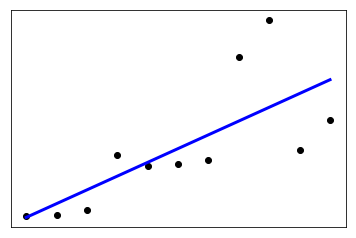

In [102]:
y_pred = model.predict(x_years)
print('predicted response:', y_pred, sep='\n')
# Plot outputs
plt.scatter(x_years, y_citation,  color='black')
plt.plot(x_years, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Q6

In [103]:
theft_data=pd.read_csv(filepath_or_buffer="BPD_Part_1_Victim_Based_Crime_Data.csv",low_memory=False)

In [107]:
theft_data['CrimeDate'] = pd.to_datetime(theft_data['CrimeDate'])

In [108]:
theft_data['CrimeDate'] 

0        2019-07-20
1        2019-07-20
2        2019-07-20
3        2019-07-20
4        2019-07-20
5        2019-07-20
6        2019-07-20
7        2019-07-20
8        2019-07-20
9        2019-07-20
10       2019-07-20
11       2019-07-20
12       2019-07-20
13       2019-07-20
14       2019-07-20
15       2019-07-20
16       2019-07-20
17       2019-07-20
18       2019-07-20
19       2019-07-20
20       2019-07-20
21       2019-07-20
22       2019-07-20
23       2019-07-20
24       2019-07-20
25       2019-07-20
26       2019-07-20
27       2019-07-20
28       2019-07-20
29       2019-07-20
            ...    
267116   2008-01-01
267117   2007-09-04
267118   2007-08-26
267119   2007-01-14
267120   2007-01-01
267121   2004-01-01
267122   2003-01-01
267123   2001-10-01
267124   2001-05-01
267125   2001-01-01
267126   2000-05-23
267127   2000-01-08
267128   2000-01-01
267129   1999-01-03
267130   1999-01-01
267131   1998-10-01
267132   1998-01-01
267133   1995-07-05
267134   1995-05-01


In [114]:
theft2015=theft_data[(theft_data['CrimeDate'] < '2016-01-01') & (theft_data['CrimeDate'] > '2014-12-31')].copy()

In [115]:
theft2015.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
173573,2015-12-31,18:53:00,6D,2900 OAKFORD AVE,LARCENY FROM AUTO,I,NaN,532.0,NORTHERN,PARKLANE,-76.663271,39.341466,NaN,UNKNOWN,NaN,1
173574,2015-12-31,09:15:00,6G,4200 PENNINGTON AVE,LARCENY,I,NaN,911.0,SOUTHERN,CURTIS BAY,-76.588635,39.227551,NaN,OTHER - INSIDE,NaN,1
173575,2015-12-31,01:45:00,3AF,4700 MORAVIA RD,ROBBERY - STREET,O,FIREARM,443.0,NORTHEAST,FRANKFORD,-76.552125,39.326226,NaN,STREET,NaN,1
173576,2015-12-31,20:00:00,3AF,5600 NORTHWOOD AVE,ROBBERY - STREET,O,FIREARM,523.0,NORTHERN,CAMERON VILLAGE,-76.597971,39.357816,NaN,STREET,NaN,1
173577,2015-12-31,14:00:00,7A,2100 W LAFAYETTE AVE,AUTO THEFT,O,NaN,722.0,WESTERN,MIDTOWN EDMONDSON,-76.651014,39.298589,NaN,STREET,NaN,1


In [119]:
theft2015.groupby("District").count()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
District,,,,,,,,,,,,,,,
CENTRAL,5321,5321,5321,5303,5321,5171,991,5314,5107,5303,5303,0,5167,531,5321
EASTERN,4062,4060,4062,4049,4062,3994,1033,4054,3932,4050,4050,0,3983,1302,4062
NORTHEAST,7518,7517,7518,7484,7518,7374,1324,7474,7276,7480,7480,0,7360,438,7518
NORTHERN,5862,5862,5862,5825,5862,5635,981,5802,5652,5802,5802,0,5630,0,5862
NORTHWEST,4425,4424,4425,4393,4425,4378,984,4403,4284,4405,4405,0,4373,526,4425
SOUTHEAST,7370,7369,7370,7337,7370,7088,1112,7313,7031,7344,7344,0,7081,49,7370
SOUTHERN,5078,5078,5078,5055,5078,4931,1008,5061,4903,5059,5059,0,4926,826,5078
SOUTHWEST,4502,4502,4502,4464,4502,4433,993,4467,4265,4467,4467,0,4416,395,4502
UNKNOWN,18,18,18,7,18,18,2,2,2,1,1,0,18,0,18


In [120]:
data2015=data_bf2019[(data_bf2019['ViolDate'] < '2018-01-01 00:00:00') & (data_bf2019['ViolDate'] > '2016-12-31 23:59:59')].copy()

In [122]:
data2015.groupby("PoliceDistrict").count()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,ViolDate,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,CouncilDistrict,Location
PoliceDistrict,,,,,,,,,,,,,,,,,,,,
CENTRAL,10913,10913,10486,10913,10913,10908,10913,10913,10913,10913,10913,10913,0,10913,10913,4,10913,10913,10913,10913
EASTERN,3261,3260,3147,3261,3261,3261,3261,3261,3261,3261,3261,3261,0,3261,3261,5,3261,3261,3261,3261
NORTHERN,9503,9498,9234,9503,9503,9503,9503,9503,9503,9503,9503,9503,0,9503,9503,25,9503,9503,9503,9503
NORTHWESTERN,2586,2586,2484,2586,2586,2585,2586,2586,2586,2586,2586,2586,0,2586,2586,1,2586,2586,2586,2586
NOTHEASTERN,5281,5277,5102,5281,5281,5281,5281,5281,5281,5281,5281,5281,0,5281,5281,3,5281,5281,5281,5281
SOUTHEASTERN,12612,12612,12089,12612,12612,12609,12612,12612,12612,12612,12612,12612,0,12612,12612,31,12612,12612,12612,12612
SOUTHERN,11448,11444,11017,11448,11448,11447,11448,11448,11448,11448,11448,11448,0,11448,11448,10,11448,11448,11448,11448
SOUTHWESTERN,2522,2520,2421,2522,2522,2522,2522,2522,2522,2522,2522,2522,0,2522,2522,1,2522,2522,2522,2522
WESTERN,2437,2437,2348,2437,2437,2437,2437,2437,2437,2437,2437,2437,0,2437,2437,1,2437,2437,2437,2437
